Chapter 19
# 鸢尾花数据到无向图
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import rbf_kernel

In [2]:
# 自定义高斯核函数
def gaussian_kernel(distance, sigma=1.0):
    return np.exp(- (distance ** 2) / (2 * sigma ** 2))

In [3]:
# 加载鸢尾花数据集
iris = load_iris()
data = iris.data[:, :2]  
# 只使用前两个特征
target = iris.target

# 计算高斯核矩阵
sigma = 0.5  # 高斯核的参数
# K = rbf_kernel(data, data)

# 计算成对距离矩阵
D = np.linalg.norm(data[:, np.newaxis, :] - data, axis=2)
K = gaussian_kernel(D, sigma)

# 计算欧氏距离矩阵
# distances = euclidean_distances(data)
# 用成对距离矩阵也可以构造无向图

<Axes: >

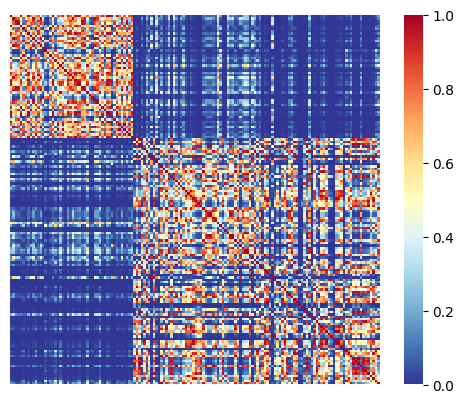

In [4]:
sns.heatmap(K, square = True, cmap = 'RdYlBu_r',
            xticklabels = [], 
            yticklabels = [])

In [5]:
np.fill_diagonal(K, 0)
# 对角线置0，避免自环

In [6]:
# 创建无向图
G = nx.Graph()
threshold = 0.8

# 添加节点
for i in range(len(data)):
    G.add_node(i, label=f"{iris.target_names[target[i]]} ({i+1})")

# 添加边，满足欧氏距离小于阈值的条件
# for i in range(len(data)):
#     for j in range(i + 1, len(data)):
#         if K[i, j] > threshold:
#             G.add_edge(i, j)

# 找到满足条件的节点对，并添加边
# 避免使用 for 循环
indices = np.where(K > threshold)
edges = list(zip(indices[0], indices[1]))

G.add_edges_from(edges)

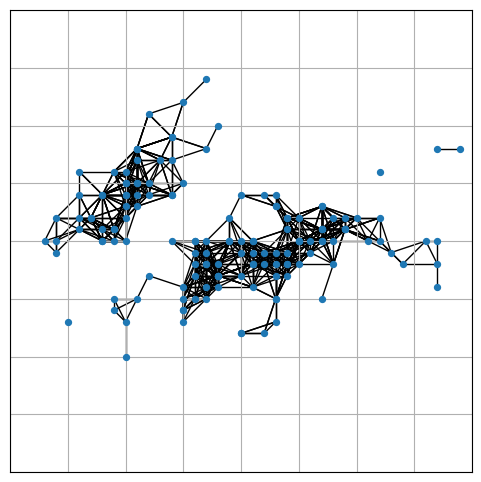

In [7]:
# 使用鸢尾花数据的真实位置绘制图形
pos = {i: (data[i, 0], data[i, 1]) for i in range(len(data))}
labels = nx.get_edge_attributes(G, 'weight')

fig, ax = plt.subplots(figsize = (6,6))
nx.draw_networkx(G, pos, with_labels=False, node_size = 18)
# node的颜色代表鸢尾花类别
# nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

ax.set_xlim(4,8)
ax.set_ylim(1,5)
ax.grid()
ax.set_aspect('equal', adjustable='box')
plt.savefig('鸢尾花_高斯核_无向图, 真实位置.svg')
plt.show()

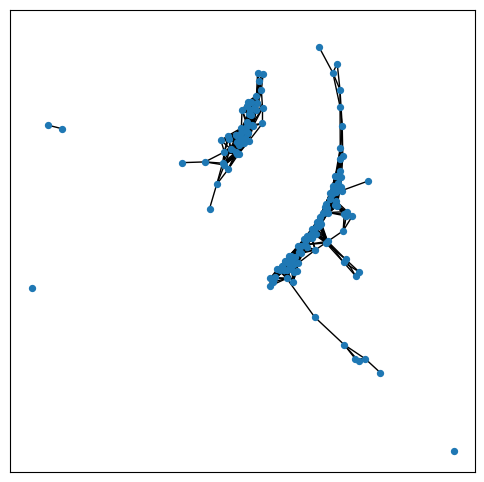

In [8]:
# 不使用真实数据位置

fig, ax = plt.subplots(figsize = (6,6))
nx.draw_networkx(G, with_labels=False, node_size = 18)
plt.savefig('鸢尾花_高斯核_无向图, 随机位置.svg')